# Fake news detection

Importing the necessary libraries

In [ ]:
import pandas as pd                 # Data analysis and manipulation
import numpy as np                  # Perform mathematical operations on data
import matplotlib.pyplot as plt     # Displaying the interactive visualizaton
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import pickle
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer   # Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import TfidfTransformer  # Term Frequency (TF) Inverse Document Frequency (IDF). It is a text vectorizer that transforms the text into a usable vector.
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score                 # Metric to measure the models perfomance
from sklearn.model_selection import train_test_split       # Split the dataset into trainign and testing
from sklearn.pipeline import Pipeline # Makes the process of inputting data into a machine learning model to be fully automated

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read datasets

In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/True.csv")

Inserting a column called "class" for fake and real news dataset as categories fake and true news. 

In [ ]:
# Add flag/class/label to track fake and real
fake["class"] = 0
true["class"] = 1

In [ ]:
fake.shape

(23481, 5)

In [ ]:
true.shape 

(21417, 5)

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
fake_manual_testing = fake.tail(10)
for i in range(23470,23460,-1):
    fake.drop([i], axis = 0, inplace = True)
true_manual_testing = true.tail(10)
for i in range(21406,21394,-1):
    true.drop([i], axis = 0, inplace = True)

In [ ]:
fake.shape, true.shape

((23471, 5), (21405, 5))

Merging the manual testing dataframe in single dataset and save it 


In [ ]:
fake_manual_testing["class"] = 0
true_manual_testing["class"] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([fake_manual_testing,true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

## Data cleaning and preparation

In [ ]:
# Concatenate dataframes
merge = pd.concat([fake, true], axis =0)
merge.head(10)
merge.shape

(44876, 5)

In [ ]:
merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(merge)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,class
0,BREAKING: Trump Campaign CAUGHT Paying Off Hi...,If you wanted to see how low the Trump campaig...,News,"October 10, 2016",0
1,COL RALPH PETERS Rips Into Obama On “Fantasy W...,This is a great take on the foreign policy of ...,politics,"Nov 6, 2015",0
2,EBRD urges Poland to revive privatizations,WARSAW (Reuters) - Poland should lower its su...,worldnews,"September 12, 2017",1
3,“Not a word”…That’s What The Parents Of Beauti...,"Kate Steinle is the wrong race, and she was k...",left-news,"Jul 14, 2015",0
4,"Even Back In 1993, Donald Trump Was Getting S...","In any other administration, this would be abs...",News,"August 29, 2017",0


In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,class
0,BREAKING: Trump Campaign CAUGHT Paying Off Hi...,If you wanted to see how low the Trump campaig...,News,0
1,COL RALPH PETERS Rips Into Obama On “Fantasy W...,This is a great take on the foreign policy of ...,politics,0
2,EBRD urges Poland to revive privatizations,WARSAW (Reuters) - Poland should lower its su...,worldnews,1
3,“Not a word”…That’s What The Parents Of Beauti...,"Kate Steinle is the wrong race, and she was k...",left-news,0
4,"Even Back In 1993, Donald Trump Was Getting S...","In any other administration, this would be abs...",News,0


In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,class
0,If you wanted to see how low the Trump campaig...,News,0
1,This is a great take on the foreign policy of ...,politics,0
2,WARSAW (Reuters) - Poland should lower its su...,worldnews,1
3,"Kate Steinle is the wrong race, and she was k...",left-news,0
4,"In any other administration, this would be abs...",News,0


All punctuations and unnecessary characters including website links which mean nothing to the data are removed before further processing

In [ ]:
# Convert to lowercase

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,text,subject,class
0,If you wanted to see how low the Trump campaig...,News,0
1,This is a great take on the foreign policy of ...,politics,0
2,WARSAW Reuters Poland should lower its surpr...,worldnews,1
3,Kate Steinle is the wrong race and she was ki...,left-news,0
4,In any other administration this would be abso...,News,0


In [ ]:
# Removing stopwords
import nltk    #Natural Language ToolKit
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,class
0,If wanted see low Trump campaign would go win ...,News,0
1,This great take foreign policy Obama administr...,politics,0
2,WARSAW Reuters Poland lower surprising level s...,worldnews,1
3,Kate Steinle wrong race killed someone Obama a...,left-news,0
4,In administration would absolute gold Every op...,News,0


## Basic data exploration

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10133
Name: text, dtype: int64


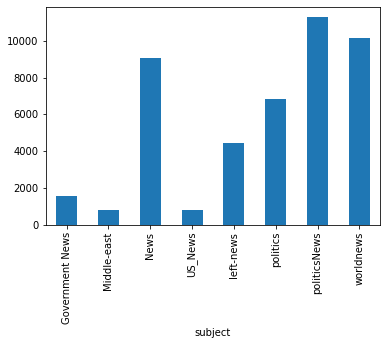

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

class
0    23471
1    21405
Name: text, dtype: int64


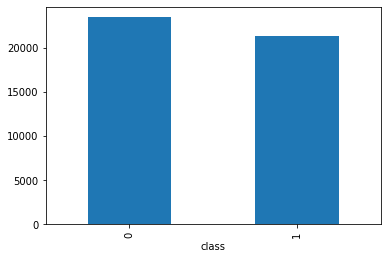

In [ ]:
# How many fake and real articles?
print(data.groupby(['class'])['text'].count())
data.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

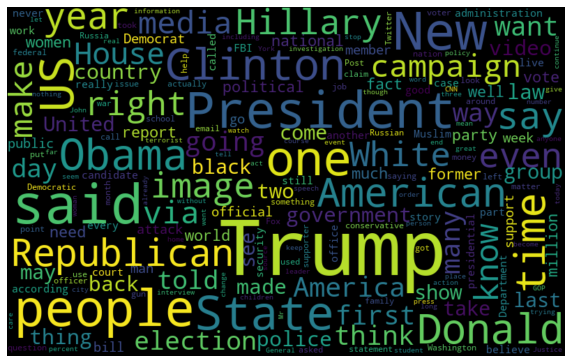

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

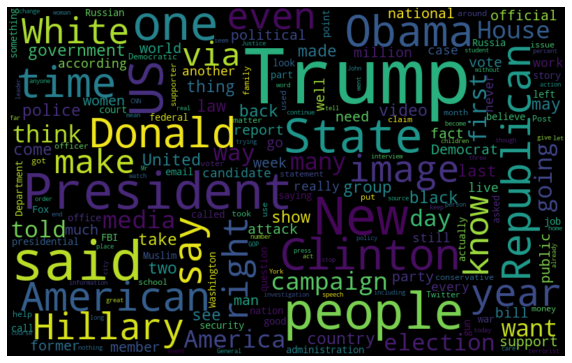

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["class"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter
# Feature extraction using TF-IDF

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

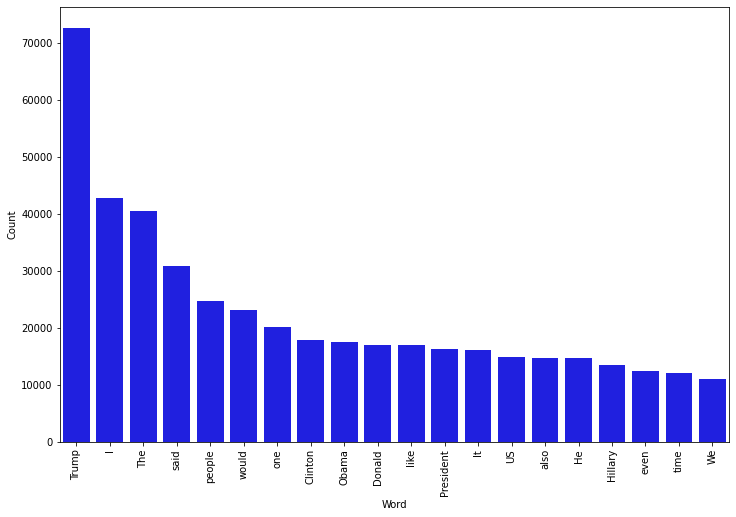

In [ ]:
# Most frequent words in fake news
counter(data[data["class"] == 0], "text", 20)

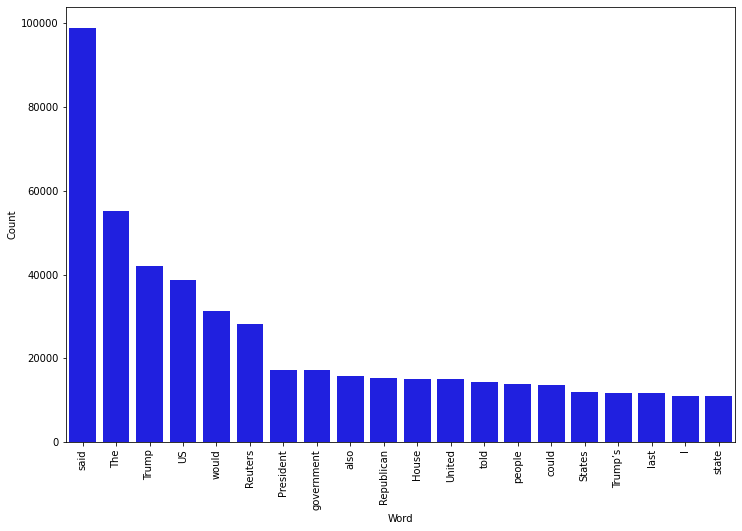

In [ ]:
# Most frequent words in real news
counter(data[data["class"] == 1], "text", 20)

## Models

In [ ]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [ ]:
x = data["text"]
y = data["class"]

Splitting the dataset into training set and testing set. 

In [ ]:
# Split the data - 20% test data and 80% train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,y_train)
pred_lr=lr.predict(xv_test)
lr.score(xv_test, y_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_lr)*100,2)))

accuracy: 98.85%


Confusion matrix, without normalization


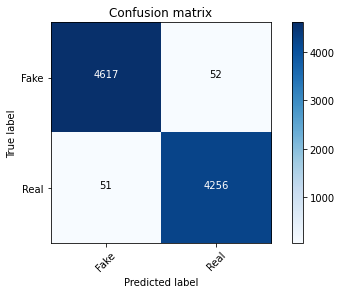

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4307

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xv_train,y_train)
pred_dt=dt.predict(xv_test)
lr.score(xv_test, y_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_dt)*100,2)))

accuracy: 99.71%


Confusion matrix, without normalization


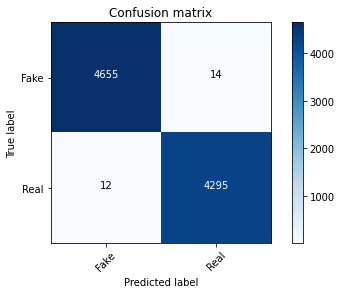

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4669
           1       1.00      1.00      1.00      4307

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(xv_train, y_train)
pred_rf=rf.predict(xv_test)
rf.score(xv_test, y_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_rf)*100,2)))

accuracy: 99.01%


Confusion matrix, without normalization


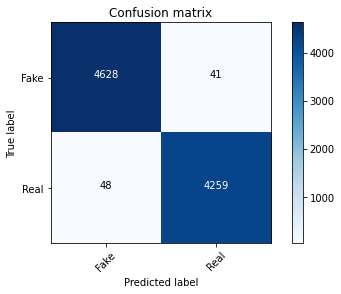

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_rf)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.99      0.99      0.99      4233

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



#Model Testing With Manual Entry


In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rf = rf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_lr[0]), 
                                                                                                              output_lable(pred_dt[0]), 
                                                                                                              output_lable(pred_rf[0])))

In [ ]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

In [ ]:
pickle.dump(manual_testing,open("model.pkl","wb"))